In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input,Model
from transformers import BertTokenizer, BertModel, TFBertModel 

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [60]:
model =tf.keras.models.load_model('1204_1dnn.h5',custom_objects={"TFBertModel": bert})

In [61]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids_title (InputLayer)   [(None, 22)]         0           []                               
                                                                                                  
 attention_mask_title (InputLay  [(None, 22)]        0           []                               
 er)                                                                                              
                                                                                                  
 input_ids_coverword (InputLaye  [(None, 20)]        0           []                               
 r)                                                                                               
                                                                                            

In [66]:
weights_3 = model.layers[-3].get_weights() 
weights_2 = model.layers[-2].get_weights() 
weights_1 = model.layers[-1].get_weights() 

In [67]:
para = np.dot(np.dot(weights_3[0],weights_2[0]),weights_1[0]).reshape(-1)

In [68]:
pd.Series(para).describe()

count    60.000000
mean      0.066885
std       0.253683
min      -0.494515
25%      -0.153985
50%       0.096088
75%       0.250511
max       0.613122
dtype: float64

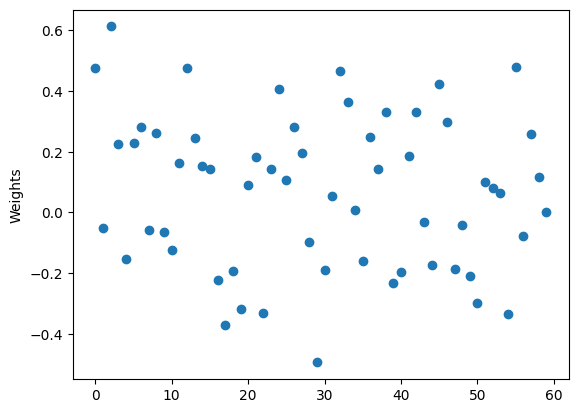

In [72]:
plt.scatter(np.arange(60),para)
# plt.vlines(x=20,ymin=para[28],ymax=para[54])
# plt.vlines(x=40,ymin=para[28],ymax=para[54])
plt.ylabel('Weights')
plt.savefig('para.png')


In [73]:
np.abs(para)[:20].mean(),np.abs(para)[20:40].mean(),np.abs(para)[40:].mean()

(0.24111915, 0.22595999, 0.19473425)